In [12]:
!pip install seaborn

In [13]:
import tweepy as tw
import numpy as np
import pandas as pd
import datetime
import seaborn as sns

from matplotlib import pyplot as plt

In [14]:
CONSUMER_KEY = 'kytjMO37C636GU102l3DJhAog'
CONSUMER_SECRET = 'AH0aN44Xk4nxrFyvqHczn6QYSrhWMzkQeeVUWcyTvS10x9iQd9'
ACCESS_TOKEN = '1343561209644138496-cmbkWhQdwP7snLoiroAWNtT5hkHka1'
ACCESS_TOKEN_SECRET = 'sNSkJkAzYQv9DyqUpu6vDB0E5UQllTkPBAo59PjZ0Vngq'

#authenticate
auth = tw.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tw.API(auth, wait_on_rate_limit = True)

In [15]:
hashtag = ["森オリンピック"]

#start_date = datetime.fromisoformat(2021-02-01)
#start_date = datetime.datetime(2021, 2, 5, 12, 00, 00)
#end_date = datetime.datetime(2021-2-11)
#end_date = datetime.datetime(2021, 2, 11, 12, 00, 00)

query = tw.Cursor(api.search, q = hashtag, since='2021-02-04', until='2021-02-11').items(1000)
tweets = [{'Tweet':tweet.text, 'Timestamp':tweet.created_at} for tweet in query]



In [16]:
users_locs = [[tweet.user.screen_name, tweet.user.location] for tweet in query]
users_locs

[]

In [4]:
df = pd.DataFrame.from_dict(tweets)
df.head()

,Tweet,Timestamp
0,RT @chocolat_psyder: というか、森会長一人を守るために「こういう意見も認...,2021-02-10 23:59:59
1,RT @lingualandjp: 森喜朗会長が辞めて影響力のない人が会長になったら、日本学...,2021-02-10 23:59:50
2,RT @lingualandjp: 森喜朗会長が辞めて影響力のない人が会長になったら、日本学...,2021-02-10 23:59:48
3,RT @hamemen: 「トヨタの価値観と異なる」 森氏発言に社長が遺憾表明 - 東京オリ...,2021-02-10 23:59:34
4,森喜朗さんがやめると\nオリンピックが中止に\nなるらしい。\n素晴らしい。\n是非、やめて...,2021-02-10 23:59:33


In [9]:
df.tail()

,Tweet,Timestamp
995,RT @HashimotoKotoe: トヨタ社長が森喜朗会長の発言に遺憾だと言うも、東京オ...,2021-02-10 23:17:11
996,森会長がメディアがこれだけ批判してるのにまだ退任していない ＝ オリンピック委員会は後任もい...,2021-02-10 23:17:10
997,RT @NIWA_KAORU: 民族浄化で強制不妊手術されている数万人の女性たちより、「女が...,2021-02-10 23:17:09
998,RT @NIWA_KAORU: 民族浄化で強制不妊手術されている数万人の女性たちより、「女が...,2021-02-10 23:17:06
999,オリンピック一年延期でボランティアする気持ちも無くなっていたんじゃないの？\n辞める口実に森...,2021-02-10 23:17:04


In [10]:
    def tokenize(self, sent):
        node = self._tagger.parseToNode( sent )
        tokens = list()
        idx = 0
        while node:
            feature = node.feature.split(',')
            token = namedtuple('Token', 'idx, surface, pos, pos_detail1, pos_detail2, pos_detail3,\
                                infl_type, infl_form, base_form, reading, phonetic')
            token.idx         = idx
            token.surface     = node.surface  # 表層形
            token.pos_jp      = feature[0]    # 品詞
            token.pos_detail1 = feature[1]    # 品詞細分類1
            token.pos_detail2 = feature[2]    # 品詞細分類2
            token.pos_detail3 = feature[3]    # 品詞細分類3
            token.infl_type   = feature[4]    # 活用型
            token.infl_form   = feature[5]    # 活用形
            token.base_form   = feature[6] if feature[6]!='*' else node.surface # 原型 ex)MacMini's base_form=='*'
            token.pos         = self.POS_DIC.get( feature[0], 'X' )     # 品詞
            token.reading     = feature[7] if len(feature) > 7 else ''  # 読み
            token.phonetic    = feature[8] if len(feature) > 8 else ''  # 発音
            # for BOS/EOS
            if token.pos != 'EOS':
                tokens.append(token)
                idx += 1
            node = node.next
        return tokens

In [17]:
import wordcloud

(-0.5, 1599.5, 799.5, -0.5)

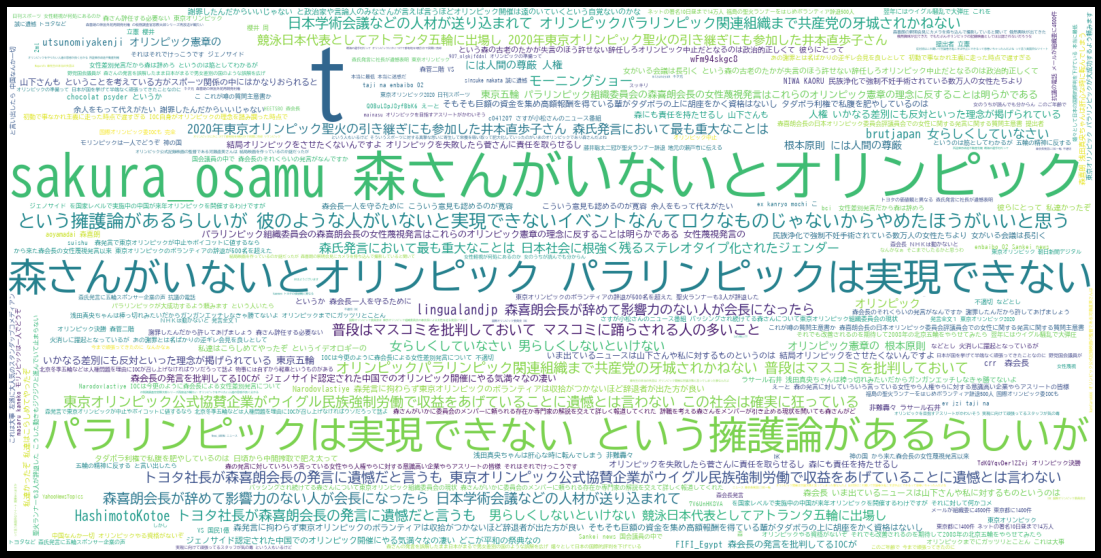

In [23]:
from wordcloud import WordCloud

Text = ' '.join(df['Tweet'].tolist())

stop_words = ['https', 'co','RT']
font_path = r"C:\WINDOWS\Fonts\BIZ-UDGothicR.TTC"

wordcloud = WordCloud(background_color="white",font_path=font_path,stopwords=set(stop_words),width=1600, height=800).generate(Text)
# Open a plot of the generated image.

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")

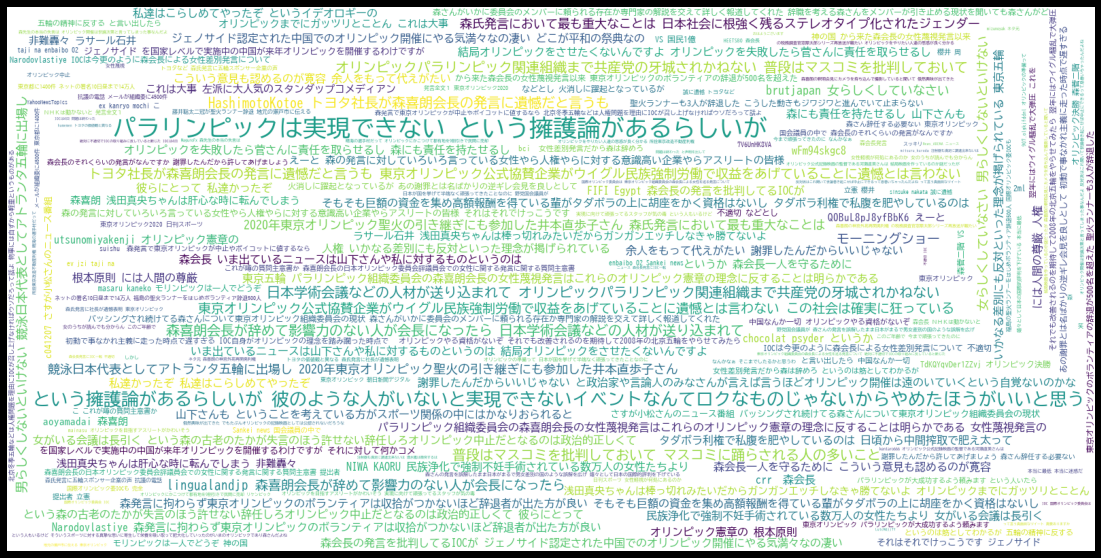

In [29]:
from wordcloud import WordCloud

Text = ' '.join(df['Tweet'].tolist())

stop_words = ['https', 'co','RT','オリンピック','パラリンピック', '森さん', 't','森さんがいないとオリンピック','sakura_osamu']
font_path = r"C:\WINDOWS\Fonts\BIZ-UDGothicR.TTC"

wordcloud = WordCloud(background_color="white",font_path=font_path,stopwords=set(stop_words),width=1600, height=800).generate(Text)
# Open a plot of the generated image.

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('Mori3.png', facecolor='k', bbox_inches='tight')

In [19]:
hashtag = ["Mori", "Olympics"]

query = tw.Cursor(api.search, q = hashtag, lan = 'en', since='2021-02-04', until='2021-02-11').items(1000)
tweets = [{'Tweet':tweet.text, 'Timestamp':tweet.created_at} for tweet in query]

dfen = pd.DataFrame.from_dict(tweets)
dfen.head()

,Tweet,Timestamp
0,We feel like calling off the Olympics. \nbecau...,2021-02-10 23:59:25
1,Opinion | Olympics official's sexism highlight...,2021-02-10 23:55:25
2,RT @ProfDanSmith: Tokyo Olympics chief Mori Yo...,2021-02-10 23:55:09
3,RT @japantimes: “We are disappointed by the re...,2021-02-10 23:51:08
4,RT @RyuichiYoneyama: “If we increase the numbe...,2021-02-10 23:49:48


In [17]:
from wordcloud import WordCloud

Text = ' '.join(dfen['Tweet'].tolist())

#stop_words = ['https', 'co','RT','Olympics','Paralympic', 'Mori', 'resign','t','Tokyo','chief']
stop_words = ['https', 'co','RT','Olympics','Paralympic', 'Mori', 'resign','t','Tokyo','chief','comments', 'Olympic']
font_path = r"C:\WINDOWS\Fonts\Roboto.TTC"
font_path2 = r"C:\WINDOWS\Fonts\BIZ-UDGothicR.TTC"

wordcloud = WordCloud(background_color="white",stopwords=set(stop_words),width=1600, height=800).generate(Text)

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('Mori-6.png', facecolor='k', bbox_inches='tight')

NameError: name 'dfen' is not defined

In [20]:
import nltk
from nltk.corpus import stopwords

from textblob import Word, TextBlob

nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
#stop_word = stopwords.words('Trump')
custom_stopwords = ['RT', 'https','co','RT','Olympics','Paralympic', 'Mori', 'resign','t','Tokyo','chief']

def preprocess_tweets(tweets, custom_stopwords):
    processed_tweet = tweets
    processed_tweet.replace('[^\w\s]','')
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in stop_words)
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in custom_stopwords)
    processed_tweet = " ".join(Word(word).lemmatize() for word in processed_tweet.split())
    return(processed_tweet)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\berna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\berna\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
dfen['Processed Tweet'] = dfen['Tweet'].apply(lambda x: preprocess_tweets(x, custom_stopwords))
dfen.head()

,Tweet,Timestamp,Processed Tweet
0,We feel like calling off the Olympics. \nbecau...,2021-02-10 23:59:25,"We feel like calling Olympics. Mori, chairman ..."
1,Opinion | Olympics official's sexism highlight...,2021-02-10 23:55:25,Opinion | official's sexism highlight bigger p...
2,RT @ProfDanSmith: Tokyo Olympics chief Mori Yo...,2021-02-10 23:55:09,@ProfDanSmith: Yoshiro: Women speak much meeti...
3,RT @japantimes: “We are disappointed by the re...,2021-02-10 23:51:08,@japantimes: “We disappointed recent comment P...
4,RT @RyuichiYoneyama: “If we increase the numbe...,2021-02-10 23:49:48,@RyuichiYoneyama: “If increase number female b...


In [1]:
pip install oseti

  Using cached oseti-0.2.tar.gz (75 kB)
  Using cached sengiri-0.2.1.tar.gz (4.3 kB)
  Using cached neologdn-0.4.tar.gz (59 kB)
  Using cached mecab-python-windows-0.996.3.tar.gz (53 kB)
  Using cached emoji-1.2.0-py3-none-any.whl (131 kB)
  Created wheel for oseti: filename=oseti-0.2-py3-none-any.whl size=74361 sha256=8af012f0f8dedc818bdc13a1951d10aac8999ec2c08aaf08e2255a6ea2a85b2f
  Stored in directory: c:\users\berna\appdata\local\pip\cache\wheels\c3\ab\95\3751df0096fbde18902237f51d13875ba30aedc22dd67f87f4
  Running setup.py clean for mecab-python-windows
  Created wheel for neologdn: filename=neologdn-0.4-cp38-cp38-win32.whl size=44404 sha256=8d53641a2a673b1622468db2b0bf52f6ecf995a1c0d6117bff506bd0834ceaf5
  Stored in directory: c:\users\berna\appdata\local\pip\cache\wheels\e4\8c\b7\1050ae9a994e00e77c9f36ffbaa6f6fa905fd713f1dfd66306
  Created wheel for sengiri: filename=sengiri-0.2.1-py3-none-any.whl size=4360 sha256=e166a9e5a7cc612f7f9a8550e7a82e294047cc5b5c0e67f3064d5b8975f52941


  ERROR: Command errored out with exit status 1:
   command: 'c:\users\berna\bmd_re\venv\scripts\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\berna\\AppData\\Local\\Temp\\pip-install-id281mk1\\mecab-python-windows_93a92048a38948cebf9e7f3b3d4c22b7\\setup.py'"'"'; __file__='"'"'C:\\Users\\berna\\AppData\\Local\\Temp\\pip-install-id281mk1\\mecab-python-windows_93a92048a38948cebf9e7f3b3d4c22b7\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\berna\AppData\Local\Temp\pip-wheel-6n1n04vr'
       cwd: C:\Users\berna\AppData\Local\Temp\pip-install-id281mk1\mecab-python-windows_93a92048a38948cebf9e7f3b3d4c22b7\
  Complete output (14 lines):
  running bdist_wheel
  running build
  running build_py
  file MeCab.py (for module MeCab) not found
  file MeCab.py (for module MeCab) not found
  running build_ext
  bu

In [28]:
pip install wheel

Note: you may need to restart the kernel to use updated packages.  Using cached wheel-0.36.2-py2.py3-none-any.whl (35 kB)



In [31]:
pip --version

pip 21.0.1 from c:\users\berna\bmd_re\venv\lib\site-packages\pip (python 3.8)

Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install --upgrade pip setuptools wheel

  Using cached setuptools-53.0.0-py3-none-any.whl (784 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 51.1.1
    Uninstalling setuptools-51.1.1:
      Successfully uninstalled setuptools-51.1.1
Note: you may need to restart the kernel to use updated packages.


In [26]:
!pip install --upgrade pip

  Using cached pip-21.0.1-py3-none-any.whl (1.5 MB)
  Attempting uninstall: pip
    Found existing installation: pip 20.3.3
    Uninstalling pip-20.3.3:
      Successfully uninstalled pip-20.3.3


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\berna\\AppData\\Local\\Temp\\pip-uninstall-tp16ifa4\\pip.exe'
Consider using the `--user` option or check the permissions.



In [27]:
pip install -U pip

Note: you may need to restart the kernel to use updated packages.


In [24]:
import vader
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# method to assign sentiment class based on compound score from VADER
def sent_Class(x ):
    if x['compound'] >= 0.05:
        return 'positive'
    elif  (x['compound'] > -0.05) and (x['compound'] < 0.05):
        return 'neutral'
    elif x['compound'] <= -0.05  :
        return 'negative'
 
#Intialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

#method to compute sentiment score for tweet
def sentiment(x ):
    
    return analyzer.polarity_scores(x)


dfen['Sentiment'] = dfen['Processed Tweet'].apply(sentiment)
dfen['SentimentCat'] = dfen['Sentiment'].apply(sent_Class)

dfen.head()

ModuleNotFoundError: No module named 'vaderSentiment.vaderSentiment'

In [ ]:
df['neg'] = df['tweets'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
df['neu'] = df['tweets'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
df['pos'] = df['tweets'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
df['compound'] = df['tweets'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
df

In [22]:
dfen.head()

,Tweet,Timestamp,Processed Tweet,Sentiment,SentimentCat
0,We feel like calling off the Olympics. \nbecau...,2021-02-10 23:59:25,"We feel like calling Olympics. Mori, chairman ...","{'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'comp...",positive
1,Opinion | Olympics official's sexism highlight...,2021-02-10 23:55:25,Opinion | official's sexism highlight bigger p...,"{'neg': 0.168, 'neu': 0.683, 'pos': 0.149, 'co...",negative
2,RT @ProfDanSmith: Tokyo Olympics chief Mori Yo...,2021-02-10 23:55:09,@ProfDanSmith: Yoshiro: Women speak much meeti...,"{'neg': 0.137, 'neu': 0.863, 'pos': 0.0, 'comp...",negative
3,RT @japantimes: “We are disappointed by the re...,2021-02-10 23:51:08,@japantimes: “We disappointed recent comment P...,"{'neg': 0.214, 'neu': 0.621, 'pos': 0.166, 'co...",negative
4,RT @RyuichiYoneyama: “If we increase the numbe...,2021-02-10 23:49:48,@RyuichiYoneyama: “If increase number female b...,"{'neg': 0.141, 'neu': 0.541, 'pos': 0.319, 'co...",positive


In [23]:
dfen['compound'] = dfen['Processed Tweet'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
dfen.head()

,Tweet,Timestamp,Processed Tweet,Sentiment,SentimentCat,compound
0,We feel like calling off the Olympics. \nbecau...,2021-02-10 23:59:25,"We feel like calling Olympics. Mori, chairman ...","{'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'comp...",positive,0.3612
1,Opinion | Olympics official's sexism highlight...,2021-02-10 23:55:25,Opinion | official's sexism highlight bigger p...,"{'neg': 0.168, 'neu': 0.683, 'pos': 0.149, 'co...",negative,-0.0772
2,RT @ProfDanSmith: Tokyo Olympics chief Mori Yo...,2021-02-10 23:55:09,@ProfDanSmith: Yoshiro: Women speak much meeti...,"{'neg': 0.137, 'neu': 0.863, 'pos': 0.0, 'comp...",negative,-0.2263
3,RT @japantimes: “We are disappointed by the re...,2021-02-10 23:51:08,@japantimes: “We disappointed recent comment P...,"{'neg': 0.214, 'neu': 0.621, 'pos': 0.166, 'co...",negative,-0.1779
4,RT @RyuichiYoneyama: “If we increase the numbe...,2021-02-10 23:49:48,@RyuichiYoneyama: “If increase number female b...,"{'neg': 0.141, 'neu': 0.541, 'pos': 0.319, 'co...",positive,0.3182


In [ ]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.bar(precip_may_aug_2005.index.values,
       precip_may_aug_2005['DAILY_PRECIP'],
       color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nMay - Aug 2005 for Boulder Creek")

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

<AxesSubplot:>

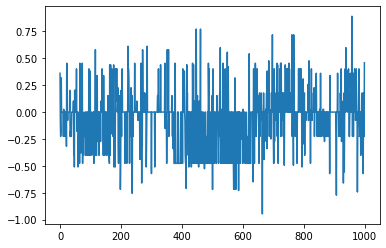

In [25]:
dfen['compound'].plot()

<AxesSubplot:>

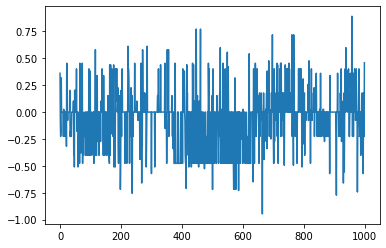

In [31]:
dfen['compound'].plot(linewidth=1.5)


In [26]:
dfen.groupby('SentimentCat')['compound'].describe()

,count,mean,std,min,25%,50%,75%,max
SentimentCat,,,,,,,,
negative,319.0,-0.362290,0.164228,-0.9468,-0.4767,-0.4019,-0.2263,-0.0772
neutral,494.0,0.001253,0.005552,0.0000,0.0000,0.0000,0.0000,0.0258
positive,187.0,0.327298,0.156601,0.0757,0.1779,0.3612,0.4019,0.8910


<AxesSubplot:title={'center':'compound'}, xlabel='SentimentCat'>

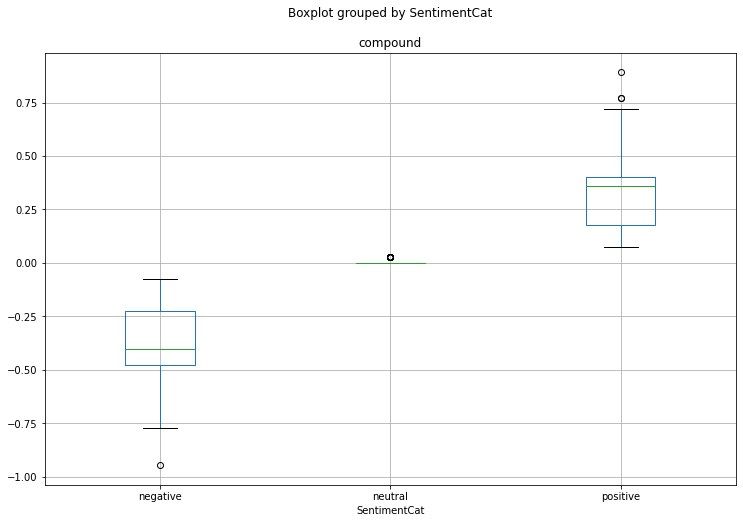

In [28]:
dfen.boxplot(by='SentimentCat', column='compound', figsize=(12,8))

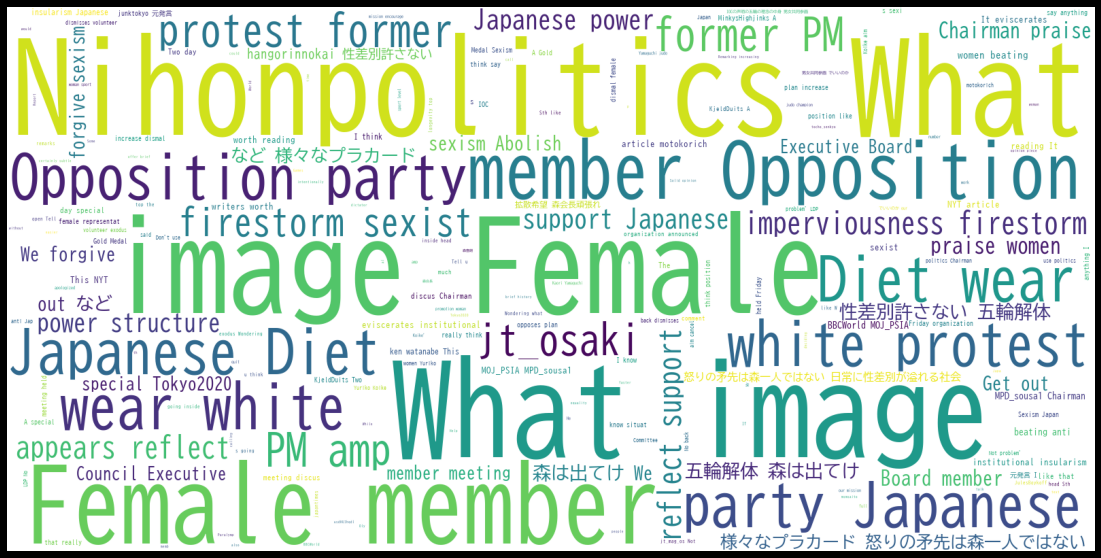

In [19]:
#Group tweets by sentiment

tweetsCategories = dfen.groupby('SentimentCat')

positiveTweets = pd.DataFrame()
negativeTweets = pd.DataFrame()

for catName,tweetCategory in tweetsCategories:
    if catName == 'positive':
        positiveTweets = tweetCategory
    elif catName == 'negative':
        negativeTweets = tweetCategory
        
#Create word cloud for both positive and negative tweets
        
positiveText = ' '.join(positiveTweets['Processed Tweet'].tolist())

stop_words = ['https', 'co','RT','Olympics','Paralympic', 'Mori', 'Yoshiro','resign','t','Tokyo','chief','comments', 'Olympic','remark']
font_path = r"C:\WINDOWS\Fonts\Roboto.TTC"
font_path2 = r"C:\WINDOWS\Fonts\BIZ-UDGothicR.TTC"

wordcloud = WordCloud(background_color="white",stopwords=set(stop_words),font_path=font_path2, width=1600, height=800).generate(positiveText)


#wordcloud = WordCloud(background_color="white",stopwords=set(stop_words),width=1600, height=800).generate(Text)


plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('PosMori4.png', facecolor='k', bbox_inches='tight')

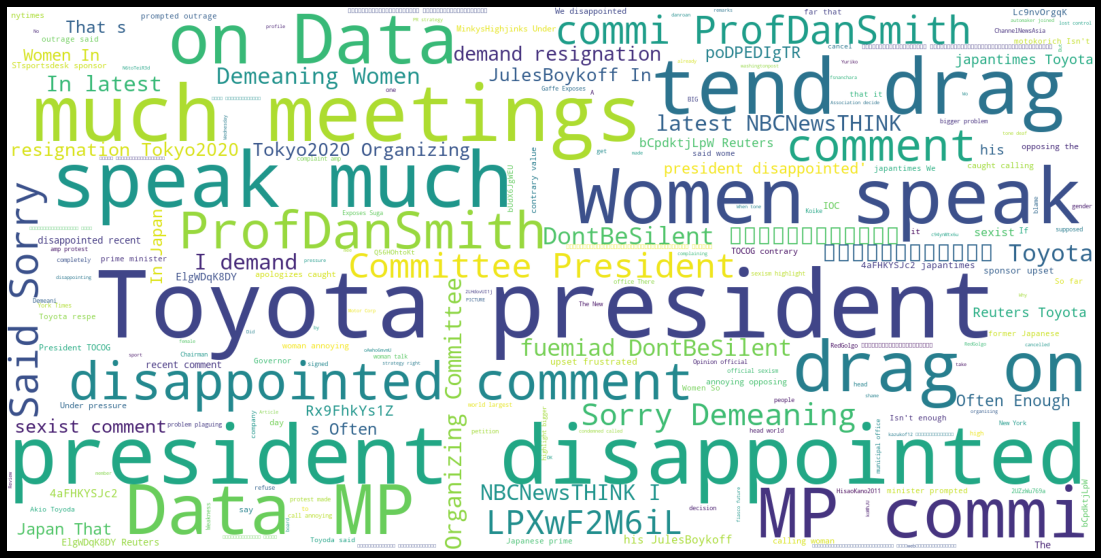

In [20]:
negativeText = ' '.join(negativeTweets['Processed Tweet'].tolist())
#stop_words = ['https', 'co','RT','Olympics','Paralympic', 'Mori', 'resign','t','Tokyo','chief','comments', 'Olympic','remark']
stop_words = ['https', 'co','RT','Olympics','Paralympic', 'Mori', 'resign','t','Tokyo','chief','comments', 'Olympic','remark','meeting', 'Yoshiro']
font_path = r"C:\WINDOWS\Fonts\Roboto.TTC"
font_path2 = r"C:\WINDOWS\Fonts\BIZ-UDGothicR.TTC"

#wordcloud = WordCloud(background_color="white",stopwords=set(stop_words),font_path=font_path2, width=1600, height=800).generate(negativeText)
wordcloud = WordCloud(background_color="white",stopwords=set(stop_words), width=1600, height=800).generate(negativeText)


#wordcloud = WordCloud(background_color="white",stopwords=set(stop_words),width=1600, height=800).generate(Text)


plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('NegMori2.png', facecolor='k', bbox_inches='tight')

In [ ]:
import MeCab
import CaboCha
from collections import namedtuple

class JpParser:
  """
  return parsed data with Mecab
  """
  POS_DIC = {
    'BOS/EOS': 'EOS', # end of sentense
    '形容詞' : 'ADJ',
    '副詞'   : 'ADV',
    '名詞'   : 'NOUN',
    '動詞'   : 'VERB',
    '助動詞' : 'AUX',
    '助詞'   : 'PART',
    '連体詞' : 'ADJ', # Japanese-specific POS
    '感動詞' : 'INTJ',
    '接続詞' : 'CONJ',
    '*'      : 'X',
  }

  def __init__(self, * ,sys_dic_path=''):
    opt_m = "-Ochasen"
    opt_c = '-f4'
    if sys_dic_path:
      opt_m += ' -d {0}'.format(sys_dic_path)
      opt_c += ' -d {0}'.format(sys_dic_path)
    tagger = MeCab.Tagger(opt_m)
    tagger.parse('') # for UnicodeDecodeError
    self._tagger = tagger
    self._parser = CaboCha.Parser(opt_c)

  def get_sentences(self, text):
    """ 
    input: text have many sentences
    output: ary of sentences ['sent1', 'sent2', ...]
    """
    EOS_DIC = ['。', '．', '！','？','!?', '!', '?' ]
    sentences = list()
    sent = ''
    for token in self.tokenize(text):
      # print(token.pos_jp, token.pos, token.surface, sent)
      # TODO: this is simple way. ex)「今日は雨ね。」と母がいった
      sent += token.surface
      if token.surface in EOS_DIC and sent != '':
        sentences.append(sent)
        sent = ''
    return sentences


  def tokenize(self, sent):
    node = self._tagger.parseToNode( sent )
    tokens = list()
    idx = 0
    while node:
      feature = node.feature.split(',')
      token = namedtuple('Token', 'idx, surface, pos, pos_detail1, pos_detail2, pos_detail3,\
                          infl_type, infl_form, base_form, reading, phonetic')
      token.idx         = idx
      token.surface     = node.surface  # 表層形
      token.pos_jp      = feature[0]    # 品詞
      token.pos_detail1 = feature[1]    # 品詞細分類1
      token.pos_detail2 = feature[2]    # 品詞細分類2
      token.pos_detail3 = feature[3]    # 品詞細分類3
      token.infl_type   = feature[4]    # 活用型
      token.infl_form   = feature[5]    # 活用形
      token.base_form   = feature[6]    # 原型
      token.pos         = self.POS_DIC.get( feature[0], 'X' )     # 品詞
      token.reading     = feature[7] if len(feature) > 7 else ''  # 読み
      token.phonetic    = feature[8] if len(feature) > 8 else ''  # 発音
      #
      tokens.append(token)
      idx += 1
      node = node.next
    return tokens



In [ ]:
if __name__ == "__main__":
  jp = JpParser( sys_dic_path='/usr/local/lib/mecab/dic/mecab-ipadic-neologd')
  # Japanese famous poem written by Soseki natusme.
  sentences = jp.get_sentences('我輩は猫である。名前はまだ無い。どこで生れたかとんと見当けんとうがつかぬ。何でも薄暗いじめじめした所でニャーニャー泣いていた事だけは記憶している。吾輩はここで始めて人間というものを見た。')
  for sent in sentences:
    # token --------------------------------------
    sent_data = jp.tokenize(sent)
    for s in sent_data:
      print(s.surface, s.base_form, s.pos)

In [ ]:
import MeCab
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def analyze_tweet():

    #Mecabを使用して、形態素解析
    mecab = MeCab.Tagger("-Ochasen")

    #"名詞", "動詞", "形容詞", "副詞"を格納するリスト
    words=[]

    #ファイルを読込み
    with open(fname, 'r',encoding="utf-8") as f:

        reader = f.readline()

        while reader:
            #Mecabで形態素解析を実施
            node = mecab.parseToNode(reader)

            while node:
                word_type = node.feature.split(",")[0]

                #取得する単語は、"名詞", "動詞", "形容詞", "副詞"
                if word_type in ["名詞", "動詞", "形容詞", "副詞"]:

                    words.append(node.surface)

                node = node.next       

            reader = f.readline()

    #wordcloudで出力するフォントを指定
    font_path = r"C:\WINDOWS\Fonts\HGRGE.TTC"

    txt = " ".join(words)

    # ストップワードの設定　※これは検索キーワードによって除外したほうがいい単語を設定
    stop_words = [ 'https','OracleInnovation' ,'Innovation','Oracle','co','the','of','Summit','Tokyo','Japan','RT',u'説明',u'データ',u'する',u'オラクル',u'日本',u'提供',u'開催',u'お客様']

    #解析した単語、ストップワードを設定、背景の色は黒にしてます
    wordcloud = WordCloud(background_color="black",font_path=font_path, stopwords=set(stop_words),
        width=800,height=600).generate(txt)

    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()


if __name__ == '__main__':

    print ('====== Enter Tweet Data file =====')
    dfile = input('>  ')

    analyze_tweet(dfile)


In [16]:
df['CleanTweet'] = df['Tweet'].apply(tokenize)

TypeError: tokenize() missing 1 required positional argument: 'sent'

import MeCab, re
import signal


class Tokeniser(object):
    def __init__(self, keywords=None, dictionary='default', japanese_only=True, lemmatize=True):
        self._KAOFINDER = make_kaofinder()
        self._BRACKETFINDER = make_bracketfinder()
        self._EMOJIFINDER = make_emojifinder()
        self._URLFINDER = make_urlfinder()
        self._lemmatize = lemmatize
        self._japanese_only = japanese_only
        self._re_text = '[0-9A-Za-zぁ-ヶ一-龠]'
        if dictionary == 'neologd':
            self._mt = MeCab.Tagger("-d /usr/local/lib/mecab/dic/mecab-ipadic-neologd")
        else:
            self._mt = MeCab.Tagger()
        if keywords is None:
            self.keywords = []
        else:
            self.keywords = keywords

    def _find_keywords(self, tweet):
        returnvalue = []
        for key in self.keywords:
            returnvalue = returnvalue + [key for i in range(tweet.count(key))]
        return returnvalue

    def _kaomoji_recursefind(self, teststring, facelist):
        faces = self._KAOFINDER.findall(teststring)
        for kao in faces:
            if len(kao) > 10:
                if len(re.findall(self._re_text, kao)) > 4:
                    firstthird = self._KAOFINDER.match(kao[:int(len(kao) / 3)])
                    if firstthird is not None:
                        facelist.append(firstthird.group())
                        facelist = self._kaomoji_recursefind(teststring.replace(firstthird.group(), ''), facelist)
                    else:
                        firsthalf = self._KAOFINDER.match(kao[:int(len(kao) / 2)])
                        if firsthalf is not None:
                            facelist.append(firsthalf.group())
                            facelist = self._kaomoji_recursefind(teststring.replace(firsthalf.group(), ''), facelist)
                else:
                    facelist.append(kao)
            else:
                facelist.append(kao)
        return facelist

    def _find_kaomoji(self, tweet):
        return self._kaomoji_recursefind(tweet, [])  # This just kicks off the recursion process in kaomoji_recursefind.

    def _find_emoji(self, tweet):
        return self._EMOJIFINDER.findall(tweet)

    def _find_brackets(self, tweet):
        return self._BRACKETFINDER.findall(tweet)

    def _find_tokens(self, tweet):
        self._mt.parse('')  # Who knows why this is required but it seems to fix UnicodeDecodeError appearing randomly.
        parsed = self._mt.parseToNode(tweet)
        components = []
        while parsed:
            if parsed.surface == 'RT':
                components.append(('RT', 'RT', 'RT_MARKER'))
            elif parsed.surface != '':
                # Original, Lemmatized, POS
                components.append((parsed.surface, parsed.feature.split(',')[-3], parsed.feature.split(',')[0]))
            parsed = parsed.next
        for a_keyword in self.keywords:
            cindex = 0
            while True:
                if cindex >= len(components):
                    break
                temp_key = a_keyword
                if components[cindex][0] == temp_key:  # If the keyword is already tagged as one item, no problem.
                    components[cindex][2] = 'PROJECT_KEYWORD'
                    cindex += 1
                    continue
                elif components[cindex][0] == temp_key[:len(components[cindex][0])]:  # We just matched the start of a keyword.
                    match = False
                    tempindex = cindex
                    temp_key = temp_key.replace(components[tempindex][0], '', 1)
                    while True:
                        tempindex += 1
                        if tempindex >= len(components):  # There is no next element, so break.
                            break
                        else:  # Test next element.
                            if components[tempindex][0] == temp_key[:len(
                                    components[tempindex][0])]:  # if it matches the next component...
                                temp_key = temp_key.replace(components[tempindex][0], '', 1)
                                if temp_key == '':
                                    match = True
                                    break
                                else:
                                    continue
                            else:
                                break
                    if match:
                        components[cindex] = (a_keyword, a_keyword, 'PROJECT_KEYWORD')
                        del components[cindex + 1:tempindex + 1]  # First component we want to remove : first to keep.
                    cindex += 1
                    continue
                else:
                    cindex += 1  # This component doesn't match the start of a keyword, so continue.
                    continue

        if self._lemmatize:
            components = [(lem, pos) for orig, lem, pos in components]
        else:
            components = [(orig, pos) for orig, lem, pos in components]

        return components

    def return_features(self, tweet):
        assert isinstance(tweet, str)

        tweet_features = {'is_rt': False,
                          'is_reply': False,
                          'exclude': False,
                          'rt_account': None}

        if self.keywords != []:
            if len(self._find_keywords(tweet)) == 0:
                tweet_features['exclude'] = True

        if self._japanese_only:
            if re.search(r'(?:[ぁ-ヶ一-龠]+)', tweet) is None:
                tweet_features['exclude'] = True

        if re.match(r"RT\s@[A-z0-9_]+", tweet) is not None:
            tweet_features['is_rt'] = True
            tweet_features['rt_account'] = re.search(r'@([A-z0-9_]+)', tweet).group()
        elif re.match(r"@([A-z0-9_]+)", tweet) is not None:
            tweet_features['is_reply'] = True

        return tweet_features

    def return_tokens(self, tweet):
        assert isinstance(tweet, str)
        temp_content = tweet.replace('\n', ' ').replace('\r', ' ').strip()
        temp_tags = []

        if self._japanese_only:
            if re.search(r'(?:[ぁ-ヶ一-龠]+)', tweet) is None:
                return 'NON_JAPANESE'

        for an_emoji in self._find_emoji(temp_content):
            temp_tags.append((an_emoji, 'EMOJI'))
            temp_content = temp_content.replace(an_emoji, ' ')
        for a_username in re.findall("@([a-z0-9_]+)", temp_content, re.I):
            temp_tags.append(('@' + a_username, 'USERNAME'))
            temp_content = temp_content.replace('@' + a_username, ' ')
        for a_hashtag in re.findall("#([a-z0-9ぁ-ヶ一-龠_]+)", temp_content, re.I):
            temp_tags.append(('#' + a_hashtag, 'HASHTAG'))
            temp_content = temp_content.replace('#' + a_hashtag, ' ')
        with timeout(10, error_message='Timed out on: {}'.format(temp_content)):
            for a_url in self._URLFINDER.findall(temp_content):
                temp_tags.append((a_url[0], 'URL'))
                temp_content = temp_content.replace(a_url[0], ' ')
        temp_content = temp_content.replace('…', ' ')
        for a_bracket in self._find_brackets(temp_content):
            temp_tags.append((a_bracket.strip('\n'), 'KANDOUJI'))
            temp_content = temp_content.replace(a_bracket, ' ')
        for a_face in self._find_kaomoji(temp_content):
            temp_tags.append((a_face.strip('\n'), 'KAOMOJI'))
            temp_content = temp_content.replace(a_face, ' ')

        temp_tags = temp_tags + self._find_tokens(temp_content)

        return temp_tags


class JsonTokeniser(object):
    def __init__(self, keywords=None, dictionary='default', japanese_only=True, lemmatize=True):
        self._KAOFINDER = make_kaofinder()
        self._BRACKETFINDER = make_bracketfinder()
        self._EMOJIFINDER = make_emojifinder()
        self._URLFINDER = make_urlfinder()
        self._japanese_only = japanese_only
        self._lemmatize = lemmatize
        self._re_text = '[0-9A-Za-zぁ-ヶ一-龠]'
        if dictionary == 'neologd':
            self._mt = MeCab.Tagger("-d /usr/local/lib/mecab/dic/mecab-ipadic-neologd")
        else:
            self._mt = MeCab.Tagger()
        if keywords is None:
            self.keywords = []
        else:
            self.keywords = keywords

    def _find_keywords(self, tweet):
        returnvalue = []
        for key in self.keywords:
            returnvalue = returnvalue + [key for i in range(tweet.count(key))]
        return returnvalue

    def _kaomoji_recursefind(self, teststring, facelist):
        faces = self._KAOFINDER.findall(teststring)
        for kao in faces:
            if len(kao) > 10:
                if len(re.findall(self._re_text, kao)) > 4:
                    firstthird = self._KAOFINDER.match(kao[:int(len(kao) / 3)])
                    if firstthird is not None:
                        facelist.append(firstthird.group())
                        facelist = self._kaomoji_recursefind(teststring.replace(firstthird.group(), ''), facelist)
                    else:
                        firsthalf = self._KAOFINDER.match(kao[:int(len(kao) / 2)])
                        if firsthalf is not None:
                            facelist.append(firsthalf.group())
                            facelist = self._kaomoji_recursefind(teststring.replace(firsthalf.group(), ''), facelist)
                else:
                    facelist.append(kao)
            else:
                facelist.append(kao)
        return facelist

    def _find_kaomoji(self, tweet):
        return self._kaomoji_recursefind(tweet, [])  # This just kicks off the recursion process in kaomoji_recursefind.

    def _find_emoji(self, tweet):
        return self._EMOJIFINDER.findall(tweet)

    def _find_brackets(self, tweet):
        return self._BRACKETFINDER.findall(tweet)

    def _find_tokens(self, tweet):
        self._mt.parse('')  # Who knows why this is required but it seems to fix UnicodeDecodeError appearing randomly.
        parsed = self._mt.parseToNode(tweet)
        components = []
        while parsed:
            if parsed.surface == 'RT':
                components.append(('RT', 'RT', 'RT_MARKER'))
            elif parsed.surface != '':
                components.append((parsed.surface, parsed.feature.split(',')[-3], parsed.feature.split(',')[0]))
            parsed = parsed.next
        for a_keyword in self.keywords:
            cindex = 0
            while True:
                if cindex >= len(components):
                    break
                temp_key = a_keyword
                if components[cindex][0] == temp_key:  # If the keyword is already tagged as one item, no problem.
                    cindex += 1
                    continue
                elif components[cindex][0] == temp_key[
                                              :len(components[cindex][0])]:  # We just matched the start of a keyword.
                    match = False
                    tempindex = cindex
                    temp_key = temp_key.replace(components[tempindex][0], '', 1)
                    while True:
                        tempindex += 1
                        if tempindex >= len(components):  # There is no next element, so break.
                            break
                        else:  # Test next element.
                            if components[tempindex][0] == temp_key[:len(
                                    components[tempindex][0])]:  # if it matches the next component...
                                temp_key = temp_key.replace(components[tempindex][0], '', 1)
                                if temp_key == '':
                                    match = True
                                    break
                                else:
                                    continue
                            else:
                                break
                    if match:
                        components[cindex] = (a_keyword, a_keyword, 'PROJECT_KEYWORD')
                        del components[cindex + 1:tempindex + 1]  # First component we want to remove : first to keep.
                    cindex += 1
                    continue
                else:
                    cindex += 1  # This component doesn't match the start of a keyword, so continue.
                    continue

        if self._lemmatize:
            components = [(lem, pos) for orig, lem, pos in components]
        else:
            components = [(orig, pos) for orig, lem, pos in components]

        return components

    def return_features(self, tweet_json):

        assert isinstance(tweet_json, dict)

        tweet_features = {'is_rt': False,
                          'is_reply': False,
                          'exclude': False,
                          'rt_account': None}

        if self.keywords != []:
            if len(self._find_keywords(tweet_json['text'])) == 0:
                tweet_features['exclude'] = True

        if self._japanese_only:
            if re.search(r'(?:[ぁ-ヶ一-龠]+)', tweet_json['text']) is None:
                tweet_features['exclude'] = True

        if 'retweeted_status' in tweet_json:
            tweet_features['is_rt'] = True
            tweet_features['rt_account'] = tweet_json['retweeted_status']['user']['screen_name']
        if tweet_json['in_reply_to_screen_name'] is not None:
            tweet_features['is_reply'] = True

        return tweet_features

    def return_tokens(self, tweet_json):
        assert isinstance(tweet_json, dict)

        temp_tags = []

        if self._japanese_only:
            if re.search(r'(?:[ぁ-ヶ一-龠]+)', tweet_json['text']) is None:
                return 'NON_JAPANESE'

        temp_content = tweet_json['text'].replace('\n', ' ').replace('\r', ' ').strip()

        for a_url in tweet_json['entities']['urls']:
            if len(a_url['expanded_url']) < 300:
                temp_tags.append((a_url['expanded_url'], 'URL'))
            else:
                temp_tags.append((a_url['url'], 'URL'))
            temp_content = temp_content.replace(a_url['url'], ' ' * len(a_url['url']))

        for a_username in tweet_json['entities']['user_mentions']:
            this_username = '@' + a_username['screen_name']
            temp_tags.append((this_username, 'USERNAME'))
            temp_content = temp_content.replace(this_username, ' ' * len(this_username))

        for a_hashtag in tweet_json['entities']['hashtags']:
            this_hashtag = '#' + a_hashtag['text']
            temp_tags.append((this_hashtag, 'HASHTAG'))
            temp_content = temp_content.replace(this_hashtag, ' ' * len(this_hashtag))

        assert len(temp_content) == len(tweet_json['text'])
        temp_content = ' '.join(temp_content.split())

        for an_emoji in self._find_emoji(temp_content):
            temp_tags.append((an_emoji, 'EMOJI'))
            temp_content = temp_content.replace(an_emoji, ' ')

        temp_content = temp_content.replace('…', ' ')

        if 'http' in temp_content:
            with timeout(10, error_message='Timed out on: {}'.format(temp_content)):
                for a_url in self._URLFINDER.findall(temp_content):
                    temp_tags.append((a_url[0], 'URL'))
                    temp_content = temp_content.replace(a_url[0], ' ')

        for a_bracket in self._find_brackets(temp_content):
            temp_tags.append((a_bracket.strip('\n'), 'KANDOUJI'))
            temp_content = temp_content.replace(a_bracket, ' ')
        for a_face in self._find_kaomoji(temp_content):
            temp_tags.append((a_face.strip('\n'), 'KAOMOJI'))
            temp_content = temp_content.replace(a_face, ' ')

        temp_tags = temp_tags + self._find_tokens(temp_content)

        return temp_tags